# Project - Gender recognition by voice
## EPFL - Statistical learning (MATH-412) 
## Adrien Besson

### 3. Classification with 80/20 split of the dataset

In [143]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as lda
import sklearn.linear_model as lm
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preproc
from sklearn import svm, tree, ensemble, neighbors, metrics
import os

In [2]:
# Load the data
input_file = os.path.join(os.getcwd(), 'data', 'voice.csv')
data = pd.read_csv(input_file)
data['label'] = data['label'].astype('category')

In [3]:
# Drop collinear columns
cols_to_drop = ['IQR', 'dfrange', 'centroid']
data = data.drop(cols_to_drop,axis=1)

In [4]:
# Assign quantitative values to the labels and drop them from the data
encoder = preproc.LabelEncoder()
labels = data['label'].values
labels = encoder.fit_transform(labels)
data = data.drop(['label'],axis=1)

## Classification based on all the features

In [132]:
# Scale the features to have mean 0 and variance 1
seed = 8
features = data.values
features = preproc.scale(features)

# Split the dataset
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(features, labels, train_size=0.8, test_size=0.2, random_state=seed)

## k-NN

In [133]:
# k-NN classification
param_grid = [
  {'n_neighbors': np.arange(1, 20, 1)}
] 
knn_grid = model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(), cv=10, param_grid=param_grid, n_jobs=-1)
knn_grid.fit(X=features_train, y=labels_train)
class_score_knn = knn_grid.score(X=features_test, y=labels_test)
print('Classification loss kNN: {0} %'.format((1-class_score_knn)*100))

Classification loss kNN: 2.208201892744477 %


In [134]:
# Best value of k
print('Best value of k: {0}'.format(knn_grid.best_estimator_.n_neighbors))

Best value of k: 3


## LDA/QDA 

In [90]:
lda_class = lda.LinearDiscriminantAnalysis()
lda_class.fit(X=features_train, y=labels_train)
class_score_lda = lda_class.score(X=features_test, y=labels_test)
print('Classification loss - LDA: {0} %'.format((1-class_score_lda)*100))

Classification loss - LDA: 3.785488958990535 %


In [91]:
qda_class = lda.QuadraticDiscriminantAnalysis()
qda_class.fit(X=features_train, y=labels_train)
class_score_qda = qda_class.score(X=features_test, y=labels_test)
print('Classification loss - QDA: {0} %'.format((1-class_score_qda)*100))

Classification loss - QDA: 4.57413249211357 %


## Logistic regression

In [92]:
# Logistic regression
logistic = lm.LogisticRegression(penalty='l2', solver='liblinear', random_state=seed)
logistic.set_params(C=1e9)
logistic.fit(features_train, labels_train)
score = logistic.score(features_test, labels_test)
logistic.fit(X=features_train, y=labels_train)
class_score_l2 = logistic.score(X=features_test, y=labels_test)
print('Classification loss - Logistic : {0} %'.format((1-class_score_l2)*100))

Classification loss - Logistic : 2.9968454258675115 %


## Logistic regression - Ridge

In [162]:
# Logistic regression with L2 regularization
logistic_reg = lm.LogisticRegressionCV(penalty='l2', cv=10, solver='liblinear', random_state=seed)
logistic_reg.fit(X=features_train, y=labels_train)
class_score_reg_l2 = logistic_reg.score(X=features_test, y=labels_test)
print('Classification loss - Logistic Ridge: {0} %'.format((1-class_score_reg_l2)*100))

Classification loss - Logistic Ridge: 2.681388012618302 %


## Logistic regression - LASSO

In [163]:
logistic_reg_l1 = lm.LogisticRegressionCV(penalty='l1', cv=10, solver='liblinear', random_state=seed)
logistic_reg_l1.fit(X=features_train, y=labels_train)
class_score_reg_l1 = logistic_reg_l1.score(X=features_test, y=labels_test)
print('Classification loss - Logistic LASSO: {0}'.format((1-class_score_reg_l1)*100))

Classification loss - Logistic LASSO: 2.5236593059936863


## Linear SVM 

In [95]:
# SVM classification - Linear kernel
param_grid = [
  {'C': [8, 9, 10 ,11 ,12], 'gamma':[0.2, 0.21, 0.22, 0.23, 0.24, 0.25]}
]
class_svm = svm.SVC(kernel='linear', random_state=seed)
class_svm_grid = model_selection.GridSearchCV(estimator=class_svm, cv=10, param_grid=param_grid, n_jobs=-1)
class_svm_grid.fit(X=features_train, y=labels_train)
score_svm = class_svm_grid.score(X=features_test, y=labels_test)
print('Classification loss - linear SVM: {0} %'.format((1-score_svm)*100))

Classification loss - linear SVM: 2.8391167192429068 %


## Kernel SVM - RBF

In [96]:
# SVM classification - RBF kernel
param_grid = [
  {'C': 2.0**(np.arange(-5, 15, 2)), 'gamma':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25], 'kernel':['rbf']}
]
class_svm = svm.SVC(random_state=seed)
class_svm_grid = model_selection.GridSearchCV(estimator=class_svm, cv=10, param_grid=param_grid, n_jobs=-1)
class_svm_grid.fit(X=features_train, y=labels_train)
score_svm = class_svm_grid.score(X=features_test, y=labels_test)
print('Classification loss - kernel SVM - L2: {0} %'.format((1-score_svm)*100))

Classification loss - kernel SVM - L2: 2.8391167192429068 %


## Decision Tree

In [97]:
param_grid = [
  {'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
dec_tree_grid = model_selection.GridSearchCV(estimator=dec_tree, cv=10, param_grid=param_grid, n_jobs=-1)
dec_tree_grid.fit(X=features_train, y=labels_train)
score_tree = dec_tree_grid.score(X=features_test, y=labels_test)
print('Classification loss - Decision tree: {0} %'.format((1-score_tree)*100))

Classification loss - Decision tree: 3.6277602523659302 %


In [113]:
# Feature importance
ind = np.argsort(dec_tree_grid.best_estimator_.feature_importances_)[::-1]
for name, importance in zip(data.columns[ind], dec_tree_grid.best_estimator_.feature_importances_[ind]):
    print('Feature: {0} - Importance: {1} %'.format(name, np.around(importance, 3)*100))

Feature: meanfun - Importance: 84.6 %
Feature: Q75 - Importance: 4.2 %
Feature: Q25 - Importance: 2.1 %
Feature: sd - Importance: 1.6 %
Feature: sfm - Importance: 1.4000000000000001 %
Feature: minfun - Importance: 1.2 %
Feature: sp.ent - Importance: 1.0 %
Feature: skew - Importance: 0.8999999999999999 %
Feature: meandom - Importance: 0.8 %
Feature: maxdom - Importance: 0.6 %
Feature: modindx - Importance: 0.4 %
Feature: kurt - Importance: 0.3 %
Feature: maxfun - Importance: 0.3 %
Feature: mode - Importance: 0.3 %
Feature: median - Importance: 0.2 %
Feature: mindom - Importance: 0.1 %
Feature: meanfreq - Importance: 0.0 %


## Random Forest

In [98]:
param_grid = [
  {'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
random_forest = ensemble.RandomForestClassifier(criterion='entropy', random_state=seed, n_jobs=-1)
random_forest_grid = model_selection.GridSearchCV(estimator=random_forest, cv=10, param_grid=param_grid, n_jobs=-1)
random_forest_grid.fit(X=features_train, y=labels_train)
score_rf = random_forest_grid.score(X=features_test, y=labels_test)
print('Classification loss - Random forest: {0} %'.format((1-score_rf)*100))

Classification loss - Random forest: 3.154574132492116 %


In [116]:
# Feature importance
ind = np.argsort(random_forest_grid.best_estimator_.feature_importances_)[::-1]
for name, importance in zip(data.columns[ind], random_forest_grid.best_estimator_.feature_importances_[ind]):
    print('Feature: {0} - Importance: {1} %'.format(name, np.around(importance, 3)*100))

Feature: meanfun - Importance: 42.199999999999996 %
Feature: Q25 - Importance: 22.3 %
Feature: sd - Importance: 8.4 %
Feature: sfm - Importance: 6.3 %
Feature: sp.ent - Importance: 4.1000000000000005 %
Feature: mode - Importance: 3.3000000000000003 %
Feature: Q75 - Importance: 2.9000000000000004 %
Feature: meanfreq - Importance: 2.0 %
Feature: skew - Importance: 1.5 %
Feature: maxdom - Importance: 1.5 %
Feature: kurt - Importance: 1.0 %
Feature: minfun - Importance: 1.0 %
Feature: modindx - Importance: 0.8 %
Feature: median - Importance: 0.8 %
Feature: mindom - Importance: 0.7000000000000001 %
Feature: meandom - Importance: 0.7000000000000001 %
Feature: maxfun - Importance: 0.6 %


## AdaBoost 

In [99]:
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500], 'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10]}
]
ada_boost = ensemble.AdaBoostClassifier(random_state=seed)
ada_boost_grid = model_selection.GridSearchCV(estimator=ada_boost, cv=10, param_grid=param_grid)
ada_boost_grid.fit(X=features_train, y=labels_train)
score_ab = ada_boost_grid.score(X=features_test, y=labels_test)
print('Classification loss - AdaBoost: {0} %'.format((1-score_ab)*100))

Classification loss - AdaBoost: 2.681388012618302 %


## Gradient Boosting

In [100]:
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500], 'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10], 'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
g_boost = ensemble.GradientBoostingClassifier(random_state=seed)
g_boost_grid = model_selection.GridSearchCV(estimator=g_boost, cv=10, param_grid=param_grid)
g_boost_grid.fit(X=features_train, y=labels_train)
score_gb = g_boost_grid.score(X=features_test, y=labels_test)
print('Classification loss - Gradient Boosting: {0} %'.format((1-score_gb)*100))

Classification loss - Gradient Boosting: 2.050473186119872 %


## Bagging

In [101]:
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500]}
]
bagging = ensemble.BaggingClassifier(random_state=seed)
bagging_grid = model_selection.GridSearchCV(estimator=bagging, cv=10, param_grid=param_grid)
bagging_grid.fit(X=features_train, y=labels_train)
score_bag = bagging_grid.score(X=features_test, y=labels_test)
print('Classification loss - Bagging: {0} %'.format((1-score_bag)*100))

Classification loss - Bagging: 3.312302839116721 %


## ROC curves of the Gradient Boosting classifier

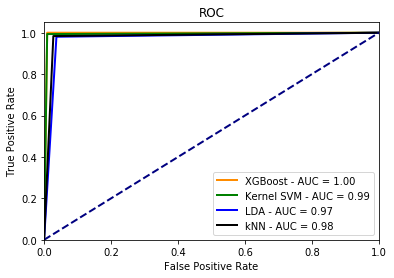

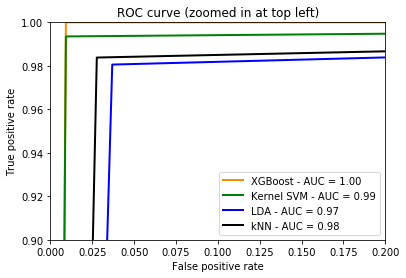

In [161]:
# Gradient boosting classifier
fpr, tpr, thresh = metrics.roc_curve(y_true=labels_test, y_score=g_boost_grid.best_estimator_.predict(X=features_test))
auc = metrics.auc(fpr, tpr)

# Kernel SVM
fpr_svm, tpr_svm, thresh = metrics.roc_curve(y_true=labels_test, y_score=class_svm_grid.best_estimator_.predict(X=features_test))
auc_svm = metrics.auc(fpr_svm, tpr_svm)

# LDA
fpr_lda, tpr_lda, thresh = metrics.roc_curve(y_true=labels_test, y_score=lda_class.predict(X=features_test))
auc_lda = metrics.auc(fpr_lda, tpr_lda)

# kNN
fpr_knn, tpr_knn, thresh = metrics.roc_curve(y_true=labels_test, y_score=knn_grid.best_estimator_.predict(X=features_test))
auc_knn = metrics.auc(fpr_knn, tpr_knn)

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='XGBoost - AUC = %0.2f' % auc)
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='Kernel SVM - AUC = %0.2f' % auc_svm)
plt.plot(fpr_lda, tpr_lda, color='blue',
         lw=lw, label='LDA - AUC = %0.2f' % auc_lda)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='kNN - AUC = %0.2f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

plt.figure(2)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='XGBoost - AUC = %0.2f' % auc)
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='Kernel SVM - AUC = %0.2f' % auc_svm)
plt.plot(fpr_lda, tpr_lda, color='blue',
         lw=lw, label='LDA - AUC = %0.2f' % auc_lda)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='kNN - AUC = %0.2f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim(0, 0.2)
plt.ylim(0.9, 1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='lower right')
plt.show()

## Conclusions
 1. Tree-based methods seem to give the best results but the results are unstable with respect to the shift of the training and test set (To see that, just run the script with a different random_state for the split)
 1. The average classification error is significantly decreased compared to the case where only meanfun was used.   